In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("/content/brca.csv")
data_copy = data.copy()

data.head(10)

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.54,14.36,87.46,566.30,0.10,0.08,0.07,0.05,0.19,...,19.26,99.70,711.20,0.14,0.18,0.24,0.13,0.30,0.07,B
1,2,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,...,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08,B
2,3,9.50,12.44,60.34,273.90,0.10,0.06,0.03,0.02,0.18,...,15.66,65.13,314.90,0.13,0.11,0.09,0.06,0.24,0.08,B
3,4,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,...,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06,B
4,5,8.20,16.84,51.71,201.90,0.09,0.06,0.02,0.01,0.18,...,21.96,57.26,242.20,0.13,0.14,0.07,0.03,0.31,0.07,B
5,6,12.05,14.63,78.04,449.30,0.10,0.09,0.07,0.03,0.17,...,20.70,89.88,582.60,0.15,0.22,0.30,0.07,0.27,0.08,B
6,7,13.49,22.30,86.91,561.00,0.09,0.08,0.05,0.03,0.18,...,31.82,99.00,698.80,0.12,0.17,0.23,0.13,0.29,0.07,B
7,8,11.76,21.60,74.72,427.90,0.09,0.05,0.02,0.01,0.15,...,25.72,82.98,516.50,0.11,0.09,0.06,0.04,0.24,0.07,B
8,9,13.64,16.34,87.21,571.80,0.08,0.06,0.02,0.02,0.14,...,23.19,96.08,656.70,0.11,0.16,0.10,0.09,0.23,0.08,B
9,10,11.94,18.24,75.71,437.60,0.08,0.05,0.02,0.01,0.19,...,21.33,83.67,527.20,0.11,0.09,0.09,0.06,0.28,0.07,B


In [6]:
data.drop(columns = "Unnamed: 0", axis =1, inplace =True)

In [7]:
#Encoding
data['y'] = [1 if data['y'][i] == "B" else 0 for i in range(len(data))]

In [8]:
#spliting data

y = data['y']
x = data.drop(columns ='y', axis =1)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
#Finding the best model

lz = LazyClassifier()
models, pre = lz.fit(x_train,x_test,y_train,y_test)
print(models)

 97%|█████████▋| 31/32 [00:07<00:00,  2.63it/s]

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4537
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:07<00:00,  4.28it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [11]:
lr = LogisticRegression(C=1, l1_ratio=0.1,penalty='l2',solver='liblinear')
model =  lr.fit(x_train, y_train)
pre = model.predict(x_test)

In [12]:
#Hyperparameter tuning

params= {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.5, 0.9] }
gr = GridSearchCV(estimator = lr, param_grid = params, cv =10,n_jobs=-1)
gr.fit(x_train, y_train)
print(gr.best_params_)

{'C': 1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


change parameters

[[41  2]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



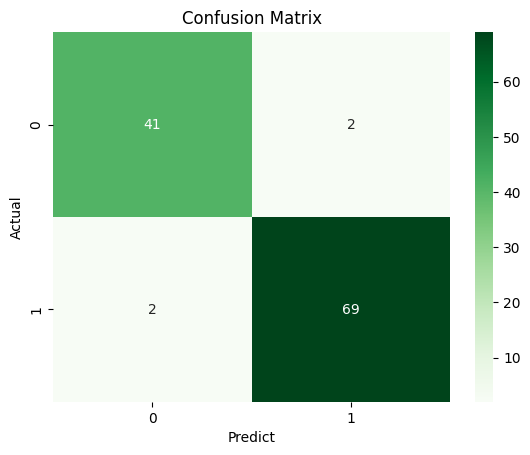

In [13]:
#Visualize results based on metrics

cr = classification_report(y_test, pre)
cm = confusion_matrix(y_test, pre)

print(cm)
print(cr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()